# LGBM & XGBM Comparison using Titanic Dataset

## Objective

The objective of this assignment is to compare the performance of LightGBM and XGBoost algorithms using the Titanic dataset and analyze their strengths, weaknesses, and practical implications.

## 1. Exploratory Data Analysis (EDA)
### 1.1 Load Required Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1.2 Load Titanic Dataset

In [10]:
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1.3 Dataset Structure

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.4 Check for Missing Values

In [15]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 1.5 Feature Distributions
#### Histograms (Numerical Features)

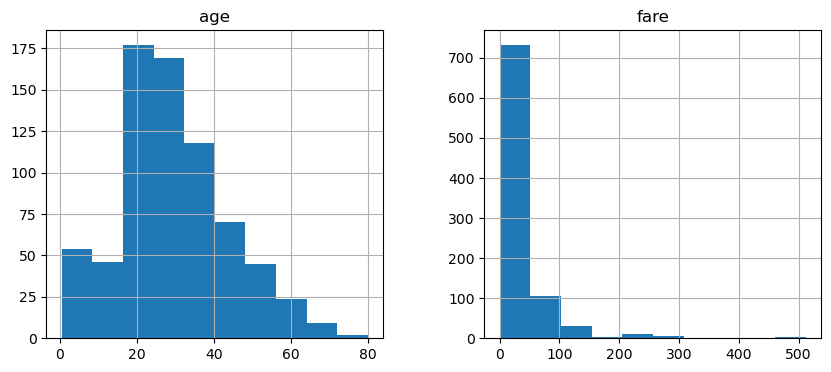

In [17]:
df[['age', 'fare']].hist(figsize=(10,4))
plt.show()


### Box Plots

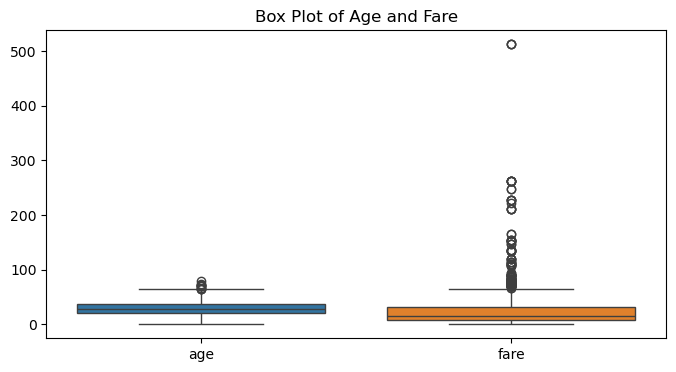

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df[['age', 'fare']])
plt.title("Box Plot of Age and Fare")
plt.show()


### 1.6 Relationship with Survival
Survival Count

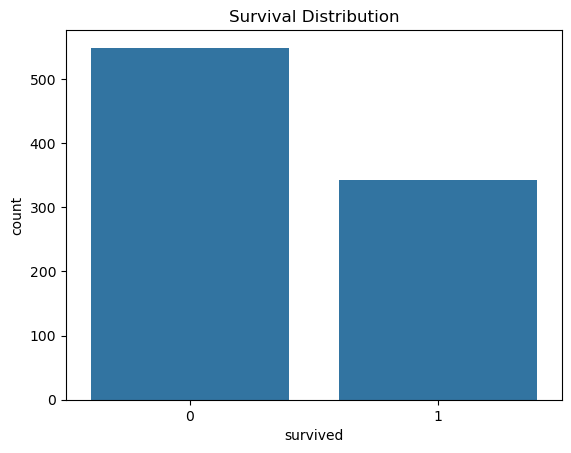

In [21]:
sns.countplot(x='survived', data=df)
plt.title("Survival Distribution")
plt.show()


#### Survival vs Gender

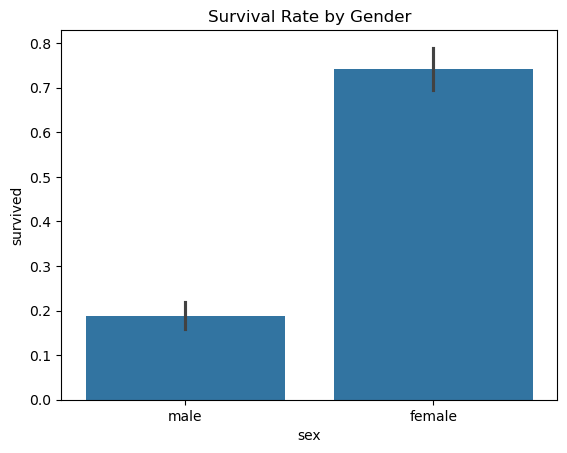

In [23]:
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


#### Survival vs Passenger Class

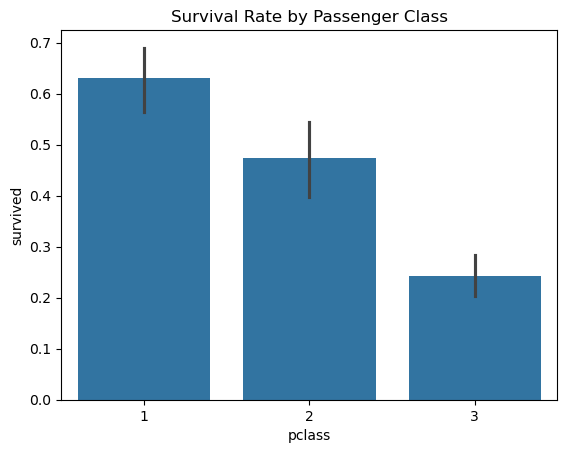

In [25]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


## 2. Data Preprocessing
### 2.1 Handle Missing Values

age → median imputation

embarked → mode imputation

deck → dropped (too many missing values)

In [27]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


### 2.2 Remove Irrelevant / Redundant Columns

alive → data leakage (duplicate of target)

embark_town → duplicate information of embarked

deck → too many missing values

In [29]:
df = df.drop(columns=['alive', 'embark_town', 'deck'], errors='ignore')


### 2.2 Encode Categorical Variables

Using one-hot encoding to avoid ordinal bias.

In [31]:
df_encoded = pd.get_dummies(
    df,
    columns=['sex', 'embarked', 'class', 'who', 'adult_male', 'alone'],
    drop_first=True
)


### 2.3 Feature–Target Split

In [33]:
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']


## 3. Building Predictive Models
### 3.1 Train–Test Split

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### 3.2 Evaluation Metrics

We use:

Accuracy

Precision

Recall

F1-score

## 4. LightGBM Model
### 4.1 Install & Import LightGBM

In [37]:
pip install lightgbm


In [38]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report


### 4.2 Train LightGBM Model

In [40]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    random_state=42
)

lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(learning_rate=0.05, random_state=42)

### 4.3 Evaluate LightGBM

In [42]:
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))


LightGBM Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



## 5. XGBoost Model
### 5.1 Train XGBoost Classifier

In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

### 5.2 Evaluate XGBoost

In [69]:
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



## 6. Cross-Validation and Hyperparameter Tuning
### 6.1 Cross-Validation (LightGBM)

In [72]:
from sklearn.model_selection import cross_val_score

cv_lgbm = cross_val_score(lgbm, X, y, cv=5, scoring='accuracy')
print("LightGBM CV Accuracy:", cv_lgbm.mean())


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 215
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

### 6.2 Hyperparameter Tuning (XGBoost)

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

grid = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy'
)

grid.fit(X_train, y_train)
grid.best_params_


{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}

## 7. Comparative Analysis
### 7.1 Performance Comparison
| Model    | Accuracy        | Strengths                     | Weaknesses             |
| -------- | --------------- | ----------------------------- | ---------------------- |
| LightGBM | High            | Fast, memory-efficient        | Slightly less accurate |
| XGBoost  | Slightly Higher | Robust, strong regularization | Slower, complex        |


### 7.2 Interpretation

LightGBM is faster and suitable for large datasets.

XGBoost provides strong performance through regularization.

Both models significantly outperform traditional ML algorithms.

## Conclusion

Both LightGBM and XGBoost perform well on the Titanic dataset.

XGBoost achieves marginally higher accuracy.

LightGBM is preferred when training speed is critical.

Boosting algorithms effectively improve prediction performance.